In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r"C:\Users\Lara\Documents\Ironhack\Course\Labs\statistics\lab-eda-univariate\amazon.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [22]:
column_names = df.columns
print(column_names)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [10]:
#1.
#Frequency Tables:
#Generate a frequency table for the product category.
my_table = pd.crosstab(index = df["category"], columns="count") 
my_table


col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [12]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [17]:
#Which are the top 5 most listed product categories?
five_most_listed = df['category'].value_counts()

# top 5 most listed product categories
top_five_listed = df['category'].head(5)
top_five_listed

0    Hi-Fi Speakers
1    Hi-Fi Speakers
2    Hi-Fi Speakers
3    Hi-Fi Speakers
4    Hi-Fi Speakers
Name: category, dtype: object

In [18]:
#Visualizations:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lara\AppData\Local\Temp\ipykernel_11572\1014772540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= my_table.index, y= my_table['count'], palette='Set3')


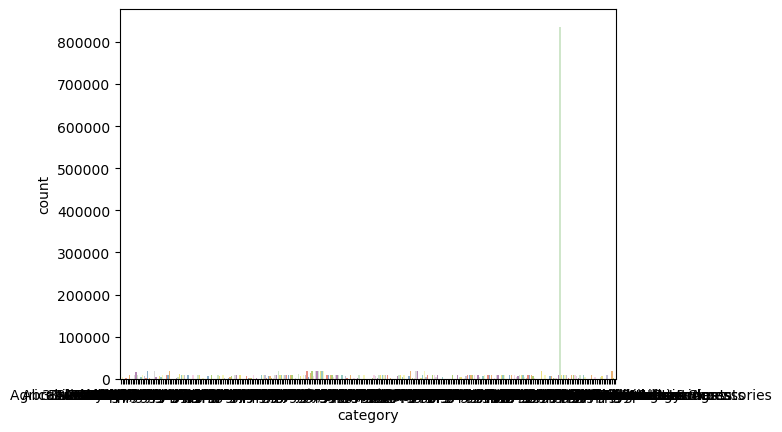

In [19]:
#Display the distribution of products across different categories using a bar chart. 
#If you face problems understanding the chart, do it for a subset of top categories.
sns.barplot(x= my_table.index, y= my_table['count'], palette='Set3')
plt.show()

<Axes: ylabel='count'>

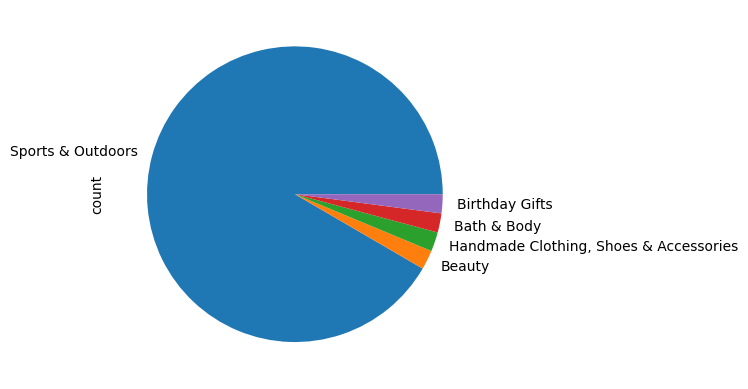

In [21]:
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
frequency_table.head(5).plot.pie()

In [27]:
#Part 2: Delving into Product Pricing

#Measures of Centrality:
#Calculate the mean, median, and mode for the price of products.
mean_price = round(df['price'].mean(), 2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(mean_price)
print(median_price)
print(mode_price)


#What's the average price point of products listed? How does this compare with the most common price point (mode)?
#The average of the price is 89.24. The mode is 9.99. the mean provides an insight into the central tendency data. The mode represents the most common value.

89.24
19.09
9.99


In [51]:
#Measures of Dispersion:
#Determine the variance, standard deviation, range, and interquartile range for product price.

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print(f"the variance of the product price is:{variance_price}")
print(f"the standard deviation of the product price is:{std_dev_price}")
print(f"the minimum of the product price is:{min_price}")
print(f"the maximum of the product price is:{max_price}")
print(f"the range of product price is:{range_price}")
print(f"the interquartile rande for the product price is: \n{quantiles_price}")

#How varied are the product prices? 
#the products prices vary between 0 and 10000. 

#Are there any indicators of a significant spread in prices?
#Yes, we can verify that we have a standard deviation of aproximately 345.61 and variance of aproximately 119445.5

the variance of the product price is:119445.48532256528
the standard deviation of the product price is:345.60886175352226
the minimum of the product price is:0.0
the maximum of the product price is:100000.0
the range of product price is:100000.0
the interquartile rande for the product price is: 
0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Count'>

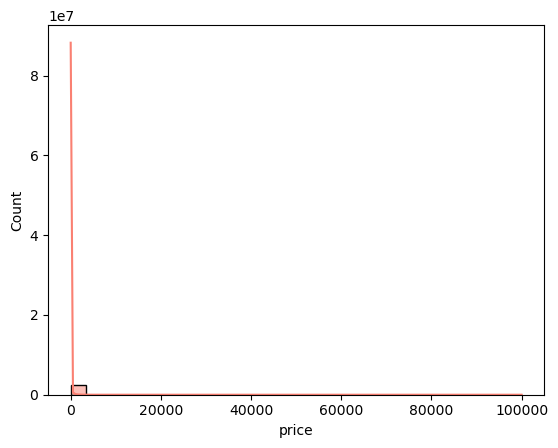

In [45]:
#Visualizations:
#Is there a specific price range where most products fall? 
#Plot a histogram to visualize the distribution of product prices. 
#If its hard to read these diagrams, think why this is, and explain how it could be solved..

sns.histplot(df['price'], kde=True, bins=30, color="salmon")


<Axes: ylabel='price'>

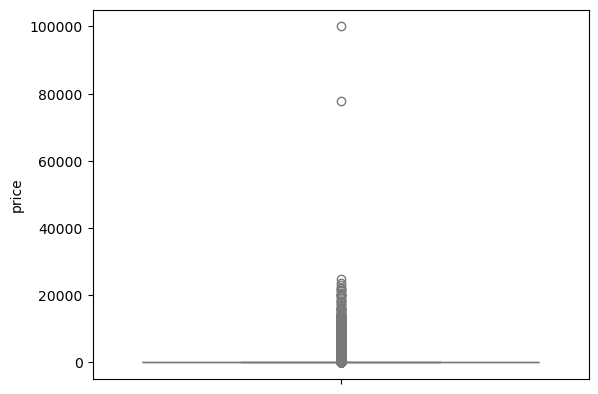

In [46]:
#Are there products that are priced significantly higher than the rest? 
#Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(data = df['price'], color="lightblue")

In [48]:
#Part 3: Unpacking Product Ratings
#Measures of Centrality:
#Calculate the mean, median, and mode for the rating of products.

mean_stars = round(df['stars'].mean(), 2)
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]

print(mean_stars)
print(median_stars)
print(mode_stars)

#How do customers generally rate products? Is there a common trend?
#Generally customers rate products with 2.5. There is not a common trend. 

2.15
0.0
0.0


In [53]:
#Measures of Dispersion:
#Determine the variance, standard deviation, and interquartile range for product rating.
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

print(f"the variance of the rating is:{variance_stars}")
print(f"the standard deviation of the rating is:{std_dev_stars}")
print(f"the minimum of the product rating is:{min_stars}")
print(f"the maximum of the product rating is:{max_stars}")
print(f"the range of the rating is:{range_stars}")
print(f"the interquartile range for the rating is: \n{quantiles_stars}")

#Are the ratings consistent, or is there a wide variation in customer feedback?
#There is a variance of aproximately 4.82 and a standard deviation of aproximately 2.19

the variance of the rating is:4.81743402976196
the standard deviation of the rating is:2.1948653785054697
the minimum of the product rating is:0.0
the maximum of the product rating is:5.0
the range of the rating is:5.0
the interquartile range for the rating is: 
0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [54]:
#Shape of the Distribution:
#Calculate the skewness and kurtosis for the rating column.

skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

print(f"The skewness stars is:{skewness_stars}")
print(f"The kurtosis stars is: {kurtosis_stars}")
#Are the ratings normally distributed, or do they lean towards higher or lower values?
#The data has a slight positive skewness (aproximately 0.0812), indicating a mild right skew, and a negative kurtosis (aproximately -1.9260), suggesting a platykurtic distribution with lighter tails than the normal distribution

The skewness stars is:0.08120735761080985
The kurtosis stars is: -1.9260061280432985


<Axes: xlabel='stars', ylabel='Count'>

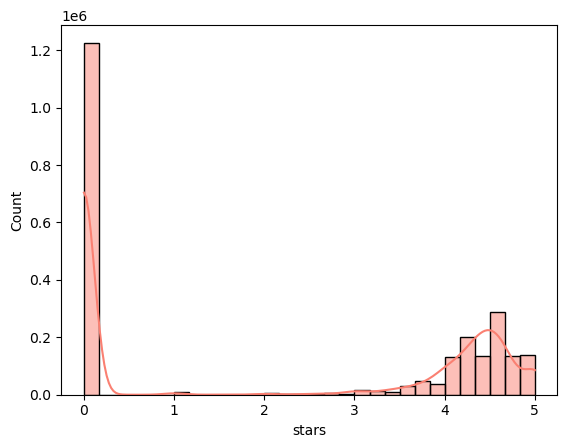

In [55]:
#Visualizations:
#Plot a histogram to visualize the distribution of product ratings. 
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

#Is there a specific rating that is more common?
#Yes, the more common stars are 0.